In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


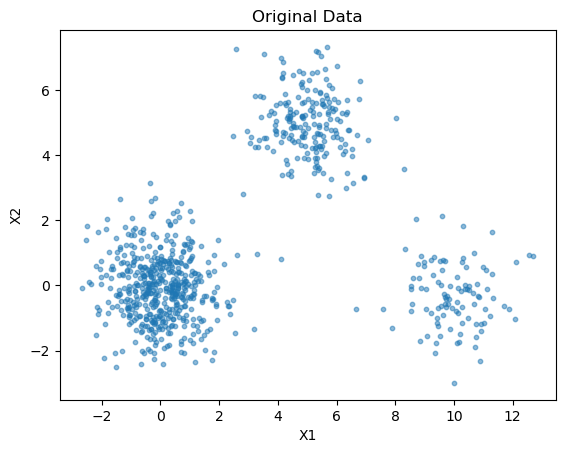

In [4]:

# Generate synthetic Gaussian blob data
np.random.seed(2)
n_samples = [500,200,100]
cluster_centers = [[0, 0], [5, 5], [10, 0]]
X = np.vstack([
    np.random.normal(loc=cluster_centers[i], scale=1.0, size=(n_samples[i], 2))
    for i in range(3)
])

# Plot the original data
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)
plt.title("Original Data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [5]:
# Fit a Gaussian Mixture Model using sklearn
gmm = GaussianMixture(n_components=3, random_state=2)
gmm.fit(X)
print('cluster centers')
print(cluster_centers)
print('estimated centers')
print(gmm.means_)
print('estimated covariances')
print(gmm.covariances_)

print('estimated weights')
print(gmm.weights_)
print('weights in our sample')

print(n_samples/np.sum(n_samples))



cluster centers
[[0, 0], [5, 5], [10, 0]]
estimated centers
[[-0.0132851  -0.08199888]
 [ 5.04039066  4.97456025]
 [ 9.96388737 -0.31801831]]
estimated covariances
[[[ 1.00526405 -0.07193092]
  [-0.07193092  1.01023674]]

 [[ 0.91938025 -0.10139261]
  [-0.10139261  0.91361387]]

 [[ 1.05124456  0.00859178]
  [ 0.00859178  0.90749257]]]
estimated weights
[0.62502956 0.2499523  0.12501814]
weights in our sample
[0.625 0.25  0.125]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


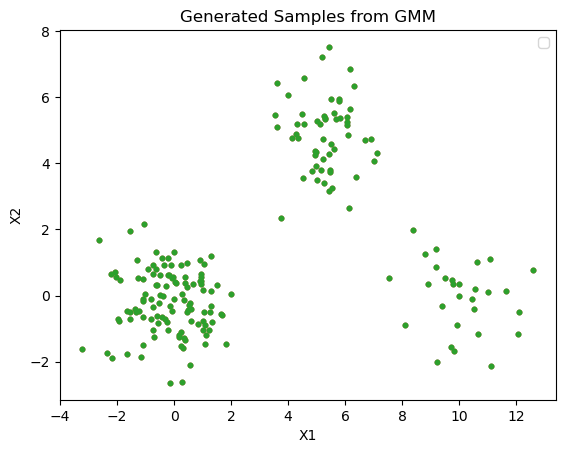

In [6]:

# Generate new samples from the trained GMM
samples = 200
generated_samples = []
for i in range(gmm.n_components):
    cluster_samples, _ = gmm.sample(n_samples=samples)
    generated_samples.append(cluster_samples)

# Plot the generated samples for each cluster
for i, cluster_samples in enumerate(generated_samples):
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], s=10)
plt.title("Generated Samples from GMM")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.show()
